# Scope
### To create a dataset from the weekend performance page of Box Office Mojo.

## Step 1: Check if website allows web-scraping.

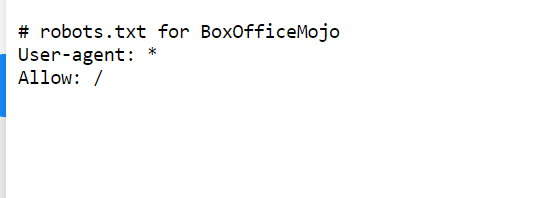

## Building Scraper Components

In [45]:
import requests
import bs4 #library to scrape information from webpages. Also known as Beatiful Soup 
from bs4 import BeautifulSoup

import pandas as pd
import time #"time" is being used to not overwhelm site's servers when scrapping information. Its a helpful way of staggering page requets.
import numpy

## Step 2: Determining the URL

In [46]:
URL = 'https://www.boxofficemojo.com/weekend/by-year/2022/'

## Step 3: Making request to the URL

In [47]:
#conducting a request of the stated URL above:
page = requests.get(URL)
content = page.text

## Step 4: Use Beautiful Soup

In [48]:
soup = BeautifulSoup(content)

## Step 5: Inspect page data to determine out to set up the scraping algroithm

Tabular data visible in a page will be put in 'tr' tags. But there are exeptions like special occasions.

In [49]:
rows = soup.findAll('tr')

In [50]:
data = rows[8].findAll('td')

In [51]:
data

[<td class="a-text-left mojo-header-column mojo-truncate mojo-field-type-date_interval mojo-sort-column"><a class="a-link-normal" href="/weekend/2022W47/?ref_=bo_wey_table_8">Nov 25-27</a><div class="a-section a-spacing-none"><span class="a-size-small a-color-secondary">Thanksgiving 3-Day<br/>World Cup (Qatar)</span></div></td>,
 <td class="a-text-right mojo-field-type-money">$89,735,916</td>,
 <td class="a-text-right mojo-number-negative mojo-number-delta mojo-field-type-percent_delta">-9.4%</td>,
 <td class="a-text-right mojo-field-type-money mojo-estimatable">$93,780,231</td>,
 <td class="a-text-right mojo-number-negative mojo-number-delta mojo-field-type-percent_delta mojo-estimatable">-6.9%</td>,
 <td class="a-text-right mojo-field-type-positive_integer">49</td>,
 <td class="a-text-left mojo-field-type-release mojo-cell-wide"><a class="a-link-normal" href="/release/rl3573908993/?ref_=bo_wey_table_8">Black Panther: Wakanda Forever</a></td>,
 <td class="a-text-left mojo-field-type-g

In [52]:
#Date when there is a special occassion listed
data[0].findAll('a')[0].text

'Nov 25-27'

In [53]:
#Special occasion that is listed
data[0].findAll('span')[0].text

'Thanksgiving 3-DayWorld Cup (Qatar)'

In [54]:
data[0].findAll('span')

[<span class="a-size-small a-color-secondary">Thanksgiving 3-Day<br/>World Cup (Qatar)</span>]

## Step 6: Test data construction

In [58]:
appended_data = []
for row in rows:
    data_row = {}
    data = row.findAll('td')
    if len(data) == 0:
        continue
    if len(data[0].findAll('span')) > 0:
        #special weekend
        data_row['occassion'] = data[0].findAll('span')[0].text
        data_row['date'] = data[0].findAll('a')[0].text
    else:
        #normal weekend
        data_row['occassion'] = ""
        data_row['date'] = data[0].text
    data_row['top10_gross'] = data[1].text
    data_row['top10_wow_change'] = data[2].text
    data_row['overall_gross'] = data[3].text
    data_row['overall_wow_change'] = data[4].text
    data_row['releases'] = data[5].text
    data_row['top_release'] = data[6].text
    data_row['week_number'] = data[10].text
    appended_data.append(data_row)
weekend_data = pd.DataFrame(appended_data, columns = ['date','occassion','top10_gross','top_wow_change','overall_gross','overall_wow_change',
                                                    'releases','top_release','week_number'])

In [59]:
weekend_data.head()

,date,occassion,top10_gross,top_wow_change,overall_gross,overall_wow_change,releases,top_release,week_number
0,"Dec 30-Jan 1, 2023",,"$102,074,088",NaN,"$103,224,144",+9%,41,Avatar: The Way of Water,52
1,"Dec 30-Jan 2, 2023",New Year's long wknd,"$134,622,744",NaN,"$136,047,635",-,39,Avatar: The Way of Water,52
2,Dec 23-26,Christmas long wknd,"$141,716,017",NaN,"$142,814,390",-,33,Avatar: The Way of Water,51
3,Dec 23-25,,"$93,952,740",NaN,"$94,711,196",-38.1%,35,Avatar: The Way of Water,51
4,Dec 16-18,World Cup (Qatar),"$151,354,815",NaN,"$152,947,812",+305.6%,50,Avatar: The Way of Water,50


## Step 7: Save to Excel or CSV file

In [60]:
weekend_data.to_csv('Movie_data.csv')